In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [84]:
df1=pd.read_csv(r"/Users/ne20641962/Desktop/Project/upi_fraud_data.csv")

In [85]:
df1.head()

,transaction_id,timestamp,user_id,receiver_id,amount,transaction_type,location,device_type,is_rooted_device,network_type,time_of_day,is_fraud
0,1,2024-06-09 12:35:00,user_2622,user_4447,9666.86,receive,Bangalore,tablet,0,5G,afternoon,0
1,2,2024-07-31 05:24:00,user_514,user_4403,3344.52,send,Bangalore,tablet,0,WiFi,night,0
2,3,2024-10-18 02:08:00,user_4415,user_3043,47735.43,receive,Kolkata,tablet,0,4G,night,0
3,4,2024-12-10 13:41:00,user_4004,user_2811,10493.61,merchant_payment,Kolkata,tablet,0,5G,afternoon,1
4,5,2024-07-17 04:50:00,user_3579,user_1654,42588.73,merchant_payment,Hyderabad,mobile,0,4G,night,0


In [86]:
df1.columns

Index(['transaction_id', 'timestamp', 'user_id', 'receiver_id', 'amount',
       'transaction_type', 'location', 'device_type', 'is_rooted_device',
       'network_type', 'time_of_day', 'is_fraud'],
      dtype='object')

In [87]:
#Data Types Overview
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    5000 non-null   int64  
 1   timestamp         5000 non-null   object 
 2   user_id           5000 non-null   object 
 3   receiver_id       5000 non-null   object 
 4   amount            5000 non-null   float64
 5   transaction_type  5000 non-null   object 
 6   location          5000 non-null   object 
 7   device_type       5000 non-null   object 
 8   is_rooted_device  5000 non-null   int64  
 9   network_type      5000 non-null   object 
 10  time_of_day       5000 non-null   object 
 11  is_fraud          5000 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 468.9+ KB


In [88]:
#Descriptive Analysis
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,5000.0,2500.50000,1443.520003,1.00,1250.7500,2500.50,3750.2500,5000.00
amount,5000.0,24790.76279,14606.474388,10.34,11847.3225,24354.19,37500.6225,49998.34
is_rooted_device,5000.0,0.04940,0.216723,0.00,0.0000,0.00,0.0000,1.00
is_fraud,5000.0,0.24720,0.431427,0.00,0.0000,0.00,0.0000,1.00


In [89]:
df1.isnull().sum()

transaction_id      0
timestamp           0
user_id             0
receiver_id         0
amount              0
transaction_type    0
location            0
device_type         0
is_rooted_device    0
network_type        0
time_of_day         0
is_fraud            0
dtype: int64

In [90]:
df1.duplicated().sum()

np.int64(0)

In [91]:
df1.shape

(5000, 12)

In [92]:
df1.nunique()

transaction_id      5000
timestamp           4967
user_id             3171
receiver_id         3126
amount              4998
transaction_type       3
location               8
device_type            2
is_rooted_device       2
network_type           3
time_of_day            4
is_fraud               2
dtype: int64

In [93]:
df1=df1.drop(["transaction_id","user_id","receiver_id"],axis=1)

In [94]:
df1.head()

,timestamp,amount,transaction_type,location,device_type,is_rooted_device,network_type,time_of_day,is_fraud
0,2024-06-09 12:35:00,9666.86,receive,Bangalore,tablet,0,5G,afternoon,0
1,2024-07-31 05:24:00,3344.52,send,Bangalore,tablet,0,WiFi,night,0
2,2024-10-18 02:08:00,47735.43,receive,Kolkata,tablet,0,4G,night,0
3,2024-12-10 13:41:00,10493.61,merchant_payment,Kolkata,tablet,0,5G,afternoon,1
4,2024-07-17 04:50:00,42588.73,merchant_payment,Hyderabad,mobile,0,4G,night,0


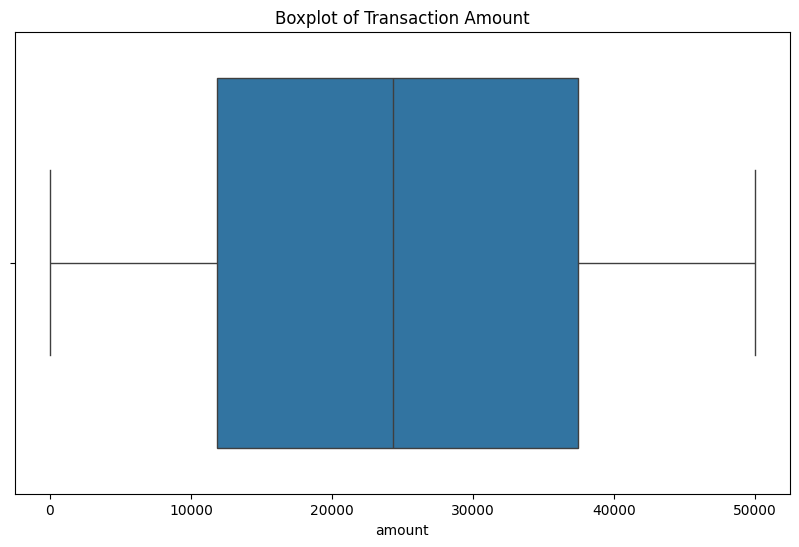

In [95]:
# Visualizing outliers in 'amount' using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

In [96]:
# Check the datatype of 'timestamp'
print(df1['timestamp'].dtype)

object


In [97]:
# Convert timestamp to datetime format
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

In [98]:
# Check the datatype of 'timestamp'
print(df1['timestamp'].dtype)

datetime64[ns]


In [99]:
# Extract year, month, day, and hour from timestamp
df1['year'] = df1['timestamp'].dt.year
df1['month'] = df1['timestamp'].dt.month_name()
df1['day'] = df1['timestamp'].dt.day
df1['day_of_week'] = df1['timestamp'].dt.day_name()

In [100]:
df1.head()

,timestamp,amount,transaction_type,location,device_type,is_rooted_device,network_type,time_of_day,is_fraud,year,month,day,day_of_week
0,2024-06-09 12:35:00,9666.86,receive,Bangalore,tablet,0,5G,afternoon,0,2024,June,9,Sunday
1,2024-07-31 05:24:00,3344.52,send,Bangalore,tablet,0,WiFi,night,0,2024,July,31,Wednesday
2,2024-10-18 02:08:00,47735.43,receive,Kolkata,tablet,0,4G,night,0,2024,October,18,Friday
3,2024-12-10 13:41:00,10493.61,merchant_payment,Kolkata,tablet,0,5G,afternoon,1,2024,December,10,Tuesday
4,2024-07-17 04:50:00,42588.73,merchant_payment,Hyderabad,mobile,0,4G,night,0,2024,July,17,Wednesday


In [101]:
df1=df1.drop(["timestamp"],axis=1)

In [102]:
df1.columns

Index(['amount', 'transaction_type', 'location', 'device_type',
       'is_rooted_device', 'network_type', 'time_of_day', 'is_fraud', 'year',
       'month', 'day', 'day_of_week'],
      dtype='object')

EDA

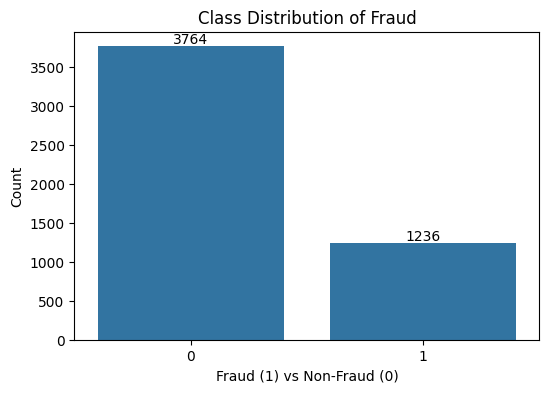

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

# Countplot
ax = sns.countplot(x='is_fraud', data=df1)
plt.title("Class Distribution of Fraud")
plt.xlabel("Fraud (1) vs Non-Fraud (0)")
plt.ylabel("Count")

# Add values on bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

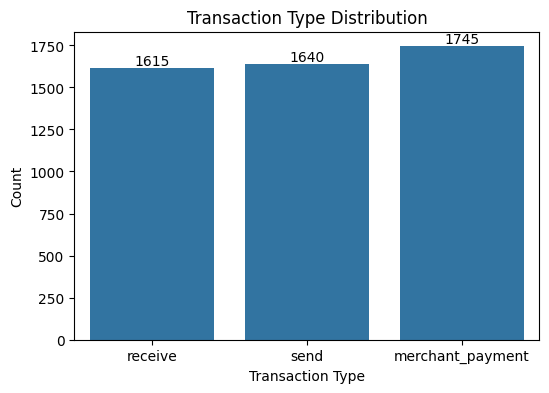

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

ax = sns.countplot(x='transaction_type', data=df1)
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()


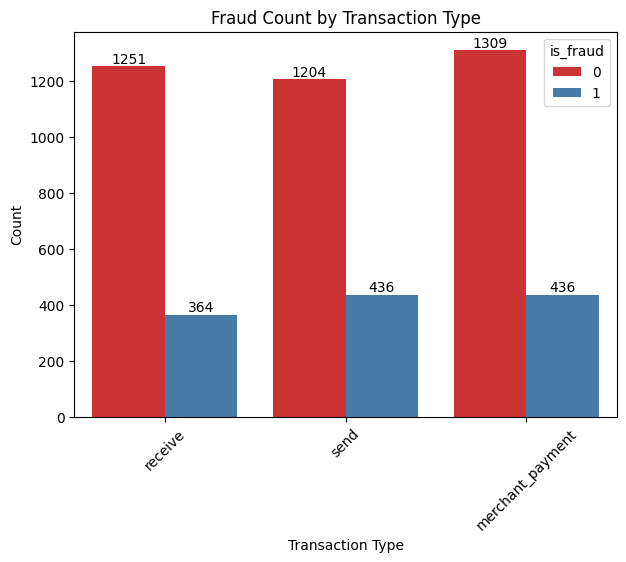

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

ax = sns.countplot(
    x='transaction_type',
    hue='is_fraud',
    data=df1,
    palette='Set1'
)

plt.title('Fraud Count by Transaction Type')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()


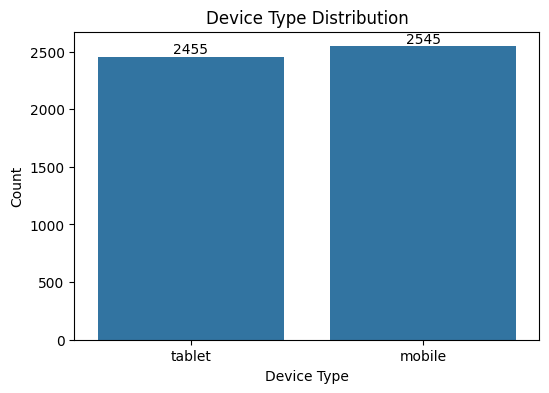

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

ax = sns.countplot(x='device_type', data=df1)
plt.title("Device Type Distribution")
plt.xlabel("Device Type")
plt.ylabel("Count")

# Add values on bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()


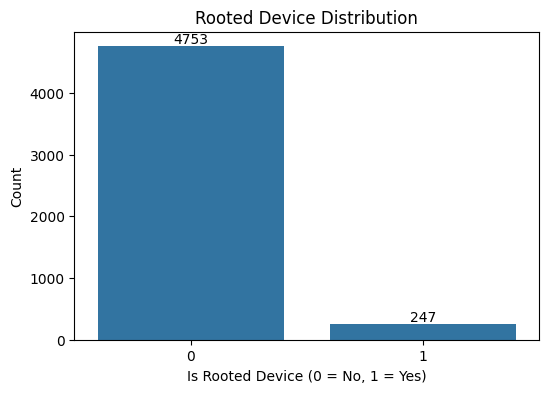

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

ax = sns.countplot(x='is_rooted_device', data=df1)
plt.title("Rooted Device Distribution")
plt.xlabel("Is Rooted Device (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Add value labels
for container in ax.containers:
    ax.bar_label(container)

plt.show()


In [108]:
df1.dtypes

amount              float64
transaction_type     object
location             object
device_type          object
is_rooted_device      int64
network_type         object
time_of_day          object
is_fraud              int64
year                  int32
month                object
day                   int32
day_of_week          object
dtype: object

In [109]:
numeric_columns=df1.select_dtypes(["int64","int32","float64"])

In [110]:
numeric_columns.head()

,amount,is_rooted_device,is_fraud,year,day
0,9666.86,0,0,2024,9
1,3344.52,0,0,2024,31
2,47735.43,0,0,2024,18
3,10493.61,0,1,2024,10
4,42588.73,0,0,2024,17


In [111]:
correlation_matrix = numeric_columns.corr()

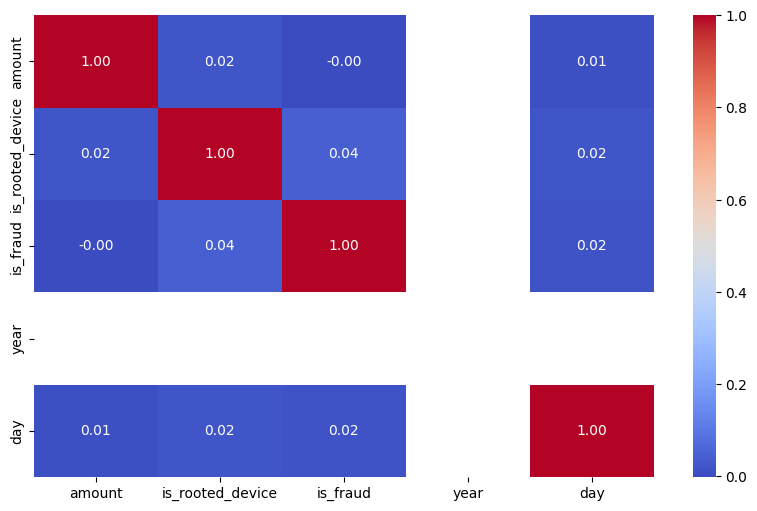

In [112]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [113]:
df1["year"].nunique()

1

In [114]:
df1.drop(columns=['year'], inplace=True)

In [115]:
df1.head()

,amount,transaction_type,location,device_type,is_rooted_device,network_type,time_of_day,is_fraud,month,day,day_of_week
0,9666.86,receive,Bangalore,tablet,0,5G,afternoon,0,June,9,Sunday
1,3344.52,send,Bangalore,tablet,0,WiFi,night,0,July,31,Wednesday
2,47735.43,receive,Kolkata,tablet,0,4G,night,0,October,18,Friday
3,10493.61,merchant_payment,Kolkata,tablet,0,5G,afternoon,1,December,10,Tuesday
4,42588.73,merchant_payment,Hyderabad,mobile,0,4G,night,0,July,17,Wednesday


In [116]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [117]:
from sklearn.preprocessing import LabelEncoder

encoders = {}   # IMPORTANT

cat_cols = [
    'transaction_type', 'location', 'device_type',
    'network_type', 'time_of_day', 'month', 'day_of_week'
]

for col in cat_cols:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    encoders[col] = le   # SAVE encoder


In [118]:
df1.head()

,amount,transaction_type,location,device_type,is_rooted_device,network_type,time_of_day,is_fraud,month,day,day_of_week
0,9666.86,1,1,1,0,1,0,0,6,9,3
1,3344.52,2,1,1,0,2,3,0,5,31,6
2,47735.43,1,5,1,0,0,3,0,10,18,0
3,10493.61,0,5,1,0,1,0,1,2,10,5
4,42588.73,0,4,0,0,0,3,0,5,17,6


In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   amount            5000 non-null   float64
 1   transaction_type  5000 non-null   int64  
 2   location          5000 non-null   int64  
 3   device_type       5000 non-null   int64  
 4   is_rooted_device  5000 non-null   int64  
 5   network_type      5000 non-null   int64  
 6   time_of_day       5000 non-null   int64  
 7   is_fraud          5000 non-null   int64  
 8   month             5000 non-null   int64  
 9   day               5000 non-null   int32  
 10  day_of_week       5000 non-null   int64  
dtypes: float64(1), int32(1), int64(9)
memory usage: 410.3 KB


In [120]:
from sklearn.preprocessing import StandardScaler
# Columns to scale
scale_cols = ['amount', 'day']
scaler = StandardScaler()
df1[scale_cols] = scaler.fit_transform(df1[scale_cols])

In [121]:
df1.head()

,amount,transaction_type,location,device_type,is_rooted_device,network_type,time_of_day,is_fraud,month,day,day_of_week
0,-1.035528,1,1,1,0,1,0,0,6,-0.770868,3
1,-1.468416,2,1,1,0,2,3,0,5,1.729883,6
2,1.571013,1,5,1,0,0,3,0,10,0.252167,0
3,-0.978921,0,5,1,0,1,0,1,2,-0.657197,5
4,1.218620,0,4,0,0,0,3,0,5,0.138496,6


In [122]:
X = df1.drop('is_fraud', axis=1)  
y = df1['is_fraud'] 

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #

In [124]:
df1["is_fraud"].value_counts(normalize=True)*100

is_fraud
0    75.28
1    24.72
Name: proportion, dtype: float64

In [125]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42,class_weight='balanced')
model.fit(X_train, y_train) #trains the model on the training data

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [126]:
y_pred_lr = model.predict(X_test) #predicts fraud on unseen test data

In [127]:
from sklearn.metrics import classification_report, accuracy_score
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.546
              precision    recall  f1-score   support

           0       0.74      0.59      0.66       742
           1       0.26      0.41      0.32       258

    accuracy                           0.55      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.62      0.55      0.57      1000



In [128]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [129]:
y_pred_dt = model.predict(X_test)

In [130]:
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree
Accuracy: 0.636
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       742
           1       0.29      0.28      0.28       258

    accuracy                           0.64      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.63      0.64      0.63      1000



In [131]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

In [132]:
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Accuracy: 0.741
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       742
           1       0.46      0.02      0.04       258

    accuracy                           0.74      1000
   macro avg       0.60      0.51      0.45      1000
weighted avg       0.67      0.74      0.64      1000



In [133]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [134]:
y_pred_knn = knn.predict(X_test)

In [135]:
print("K-Nearest Neighbors Classification")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classification
Accuracy: 0.706
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       742
           1       0.33      0.14      0.19       258

    accuracy                           0.71      1000
   macro avg       0.54      0.52      0.51      1000
weighted avg       0.64      0.71      0.66      1000



In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'solver': ['liblinear', 'saga'],         # Solver options
    'class_weight': ['balanced', None],      # Handle class imbalance
    'max_iter': [100, 200, 300]              # Number of iterations
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, n_jobs=-1, scoring='f1')

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)

# Use the best model for predictions
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Best Parameters for Logistic Regression: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'saga'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.54      0.63       742
           1       0.25      0.44      0.32       258

    accuracy                           0.52      1000
   macro avg       0.49      0.49      0.47      1000
weighted avg       0.61      0.52      0.55      1000



In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, 30, None],             # Maximum depth of tree
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples per leaf
    'class_weight': ['balanced', None],          # Handle class imbalance
    'criterion': ['gini', 'entropy']             # Splitting criterion
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1, scoring='f1')

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

# Use the best model for predictions
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Best Parameters for Decision Tree: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.42      0.54       742
           1       0.26      0.60      0.37       258

    accuracy                           0.47      1000
   macro avg       0.51      0.51      0.45      1000
weighted avg       0.63      0.47      0.50      1000



In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],           # Number of trees in forest
    'max_depth': [10, 20, 30, None],            # Maximum depth of tree
    'min_samples_split': [2, 5, 10],            # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum samples per leaf
    'class_weight': ['balanced', None]          # Handle class imbalance
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1, scoring='f1')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Use the best model for predictions
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       742
           1       0.31      0.18      0.23       258

    accuracy                           0.69      1000
   macro avg       0.53      0.52      0.52      1000
weighted avg       0.64      0.69      0.65      1000



In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],               # Number of neighbors
    'weights': ['uniform', 'distance'],         # Weight function
    'metric': ['euclidean', 'manhattan'],      # Distance metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute nearest neighbors
}

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1, scoring='f1')

# Fit the model
grid_search_knn.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Use the best model for predictions
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Evaluation
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))


Best Parameters for KNN: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       742
           1       0.30      0.17      0.22       258

    accuracy                           0.68      1000
   macro avg       0.53      0.52      0.51      1000
weighted avg       0.63      0.68      0.65      1000



In [140]:
import numpy as np
from sklearn.metrics import f1_score

def best_threshold(y_true, y_proba):
    thresholds = np.arange(0.0, 1.01, 0.01)
    best_thresh = 0.5
    best_f1 = 0.0
    for thresh in thresholds:
        y_pred = (y_proba > thresh).astype(int)
        f1 = f1_score(y_true, y_pred, pos_label=1)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh
    return best_thresh, best_f1

In [141]:

# Predict probabilities
proba_lr = best_lr.predict_proba(X_test)[:, 1]

# Find best threshold using F1
thresh_lr, f1_lr = best_threshold(y_test, proba_lr)

# Predict using custom threshold
pred_lr = (proba_lr > thresh_lr).astype(int)

# Print results
print(f"Best Threshold (Logistic Regression): {thresh_lr:.2f}, F1: {f1_lr:.2f}")
print(classification_report(y_test, pred_lr, digits=2))


Best Threshold (Logistic Regression): 0.00, F1: 0.41
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       742
           1       0.26      1.00      0.41       258

    accuracy                           0.26      1000
   macro avg       0.13      0.50      0.21      1000
weighted avg       0.07      0.26      0.11      1000



In [142]:
proba_dt = best_dt.predict_proba(X_test)[:, 1]
thresh_dt, f1_dt = best_threshold(y_test, proba_dt)
pred_dt = (proba_dt > thresh_dt).astype(int)

print(f"Best Threshold (Decision Tree): {thresh_dt:.2f}, F1: {f1_dt:.2f}")
print(classification_report(y_test, pred_dt, digits=2))


Best Threshold (Decision Tree): 0.33, F1: 0.40
              precision    recall  f1-score   support

           0       0.78      0.28      0.41       742
           1       0.27      0.78      0.40       258

    accuracy                           0.41      1000
   macro avg       0.53      0.53      0.41      1000
weighted avg       0.65      0.41      0.41      1000



In [143]:
proba_rf = best_rf.predict_proba(X_test)[:, 1]
thresh_rf, f1_rf = best_threshold(y_test, proba_rf)
pred_rf = (proba_rf > thresh_rf).astype(int)

print(f"Best Threshold (Random Forest): {thresh_rf:.2f}, F1: {f1_rf:.2f}")
print(classification_report(y_test, pred_rf, digits=2))


Best Threshold (Random Forest): 0.31, F1: 0.42
              precision    recall  f1-score   support

           0       0.84      0.08      0.14       742
           1       0.27      0.96      0.42       258

    accuracy                           0.30      1000
   macro avg       0.55      0.52      0.28      1000
weighted avg       0.69      0.30      0.21      1000



In [144]:
proba_knn = best_knn.predict_proba(X_test)[:, 1]
thresh_knn, f1_knn = best_threshold(y_test, proba_knn)
pred_knn = (proba_knn > thresh_knn).astype(int)

print(f"Best Threshold (KNN): {thresh_knn:.2f}, F1: {f1_knn:.2f}")
print(classification_report(y_test, pred_knn, digits=2))


Best Threshold (KNN): 0.21, F1: 0.40
              precision    recall  f1-score   support

           0       0.79      0.47      0.59       742
           1       0.29      0.63      0.40       258

    accuracy                           0.51      1000
   macro avg       0.54      0.55      0.49      1000
weighted avg       0.66      0.51      0.54      1000



In [145]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Balanced Random Forest
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)
print("Balanced Random Forest Report:")
print(classification_report(y_test, y_pred_brf))

# Easy Ensemble Classifier
eec = EasyEnsembleClassifier(n_estimators=10, random_state=42)
eec.fit(X_train, y_train)
y_pred_eec = eec.predict(X_test)
print("Easy Ensemble Classifier Report:")
print(classification_report(y_test, y_pred_eec))


Balanced Random Forest Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       753
           1       0.30      0.23      0.26       247

    accuracy                           0.67      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.65      0.67      0.66      1000

Easy Ensemble Classifier Report:
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       753
           1       0.27      0.54      0.36       247

    accuracy                           0.53      1000
   macro avg       0.52      0.53      0.50      1000
weighted avg       0.65      0.53      0.56      1000



In [146]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)


In [147]:
def find_best_threshold(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    thresholds = np.linspace(0, 1, 101)
    
    best_f1 = 0
    best_threshold = 0
    for thresh in thresholds:
        y_pred = (y_proba >= thresh).astype(int)
        f1 = f1_score(y_test, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = thresh
            
    # Final prediction with best threshold
    y_pred_final = (y_proba >= best_threshold).astype(int)
    
    print(f"🔹 Best Threshold: {best_threshold:.2f}")
    print(f"Precision: {precision_score(y_test, y_pred_final):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred_final):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred_final):.2f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.2f}")
    
    return best_threshold, y_pred_final


In [148]:
brf = BalancedRandomForestClassifier(random_state=42, n_estimators=100)
brf.fit(X_train, y_train)

print("Balanced Random Forest Threshold Tuning:")
best_thresh_brf, pred_brf = find_best_threshold(brf, X_test, y_test)

Balanced Random Forest Threshold Tuning:
🔹 Best Threshold: 0.23
Precision: 0.25
Recall: 1.00
F1 Score: 0.40
Accuracy: 0.26


In [149]:
eec = EasyEnsembleClassifier(random_state=42, n_estimators=10)
eec.fit(X_train, y_train)

print("\nEasy Ensemble Classifier Threshold Tuning:")
best_thresh_eec, pred_eec = find_best_threshold(eec, X_test, y_test)



Easy Ensemble Classifier Threshold Tuning:
🔹 Best Threshold: 0.38
Precision: 0.25
Recall: 1.00
F1 Score: 0.40
Accuracy: 0.25


In [150]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predicted probabilities for class 1
y_proba = model.predict_proba(X_test)[:, 1]  # model = your trained classifier

# Define fine threshold range (focus on likely optimal zone)
thresholds = np.arange(0.2, 0.61, 0.01)

best_threshold = 0.5
best_f1 = 0

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh, zero_division=0)
    recall = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)

    print(f"Threshold: {thresh:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1: {f1:.2f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"\n🔹 Best Threshold: {best_threshold:.2f} | Best F1 Score: {best_f1:.2f}")


Threshold: 0.20 | Precision: 0.64 | Recall: 0.96 | F1: 0.76
Threshold: 0.21 | Precision: 0.67 | Recall: 0.94 | F1: 0.78
Threshold: 0.22 | Precision: 0.68 | Recall: 0.94 | F1: 0.79
Threshold: 0.23 | Precision: 0.69 | Recall: 0.91 | F1: 0.79
Threshold: 0.24 | Precision: 0.71 | Recall: 0.90 | F1: 0.79
Threshold: 0.25 | Precision: 0.74 | Recall: 0.89 | F1: 0.81
Threshold: 0.26 | Precision: 0.76 | Recall: 0.88 | F1: 0.81
Threshold: 0.27 | Precision: 0.76 | Recall: 0.86 | F1: 0.81
Threshold: 0.28 | Precision: 0.77 | Recall: 0.85 | F1: 0.81
Threshold: 0.29 | Precision: 0.79 | Recall: 0.85 | F1: 0.82
Threshold: 0.30 | Precision: 0.82 | Recall: 0.83 | F1: 0.83
Threshold: 0.31 | Precision: 0.85 | Recall: 0.83 | F1: 0.84
Threshold: 0.32 | Precision: 0.88 | Recall: 0.83 | F1: 0.85
Threshold: 0.33 | Precision: 0.89 | Recall: 0.83 | F1: 0.86
Threshold: 0.34 | Precision: 0.91 | Recall: 0.81 | F1: 0.85
Threshold: 0.35 | Precision: 0.94 | Recall: 0.80 | F1: 0.86
Threshold: 0.36 | Precision: 0.94 | Reca

In [151]:
import numpy as np
from sklearn.metrics import f1_score, classification_report, accuracy_score

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]  # Replace 'model' with your classifier

# Define thresholds to try
thresholds = np.arange(0.1, 0.91, 0.01)

best_thresh = 0.5
best_f1 = 0

for thresh in thresholds:
    y_pred = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

# Final prediction using best threshold
y_pred_final = (y_proba >= best_thresh).astype(int)

print(f"\n🔹 Best Threshold: {best_thresh:.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_final):.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, zero_division=0))



🔹 Best Threshold: 0.46
F1 Score: 0.87
Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       753
           1       0.99      0.78      0.87       247

    accuracy                           0.94      1000
   macro avg       0.96      0.89      0.92      1000
weighted avg       0.95      0.94      0.94      1000



In [158]:
import pickle
from datetime import datetime

artifact = {
    "model": eec,
    "threshold": 0.46,
    "encoders": encoders,
    "scaler": scaler,
    "metadata": {
        "features_expected": list(X_train.columns),
        "created_on": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }
}

with open("easyensemble_fraud_model.pkl", "wb") as f:
    pickle.dump(artifact, f)

print("✅ Model saved")


✅ Model saved
